## **Thought Experiment without Computer**

In [ ]:
import numpy as np

In [ ]:
topic = {}

In [ ]:
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(), np.random.rand(6))))

In [ ]:
tfidf

{'NYC': 0.33204203515139263,
 'apple': 0.11808424360078185,
 'cat': 0.4841629810528596,
 'dog': 0.9648639291980327,
 'lion': 0.5171759262649238,
 'love': 0.8120541939014606}

In [ ]:
topic['petness'] = (.3 * tfidf['cat'] +\
                    .3 * tfidf['dog'] +\
                    0 * tfidf['apple']+\
                    0 * tfidf['lion']-\
                    .2 * tfidf['NYC']+\
                    .2 * tfidf['love'])

In [ ]:
topic['animalness'] = (.1 * tfidf['cat']+\
                       .1 * tfidf['dog']-\
                       .1 * tfidf['apple']+\
                       .5 * tfidf['lion']+\
                       .1 * tfidf['NYC']-\
                       .1 * tfidf['love'])

In [ ]:
topic['cityness'] = (.0 * tfidf['cat']-\
                       .1 * tfidf['dog']+\
                       .2 * tfidf['apple']-\
                       .1 * tfidf['lion']+\
                       .5 * tfidf['NYC']+\
                       .1 * tfidf['love'])

In [ ]:
topic

{'animalness': 0.34368101392246614,
 'cityness': 0.1226393001397031,
 'petness': 0.5307105048252814}

In [ ]:
word_vector = {}

In [ ]:
word_vector['cat'] = (.3 * topic['petness'] + .1 * topic['animalness'] + 0 * topic['cityness']) 

In [ ]:
word_vector['dog'] = (.3 * topic['petness'] + .1 * topic['animalness'] - .1 * topic['cityness'] )

In [ ]:
word_vector['apple'] = (0 * topic['petness'] - .1 * topic['animalness'] + .2 * topic['cityness'] )

In [ ]:
word_vector['lion'] = (0* topic['petness'] + .5 * topic['animalness'] - .1 * topic['cityness'])

In [ ]:
word_vector['NYC'] = (- .2 * topic['petness'] + .1 * topic['animalness'] + .5 * topic['cityness'])

In [ ]:
word_vector['love'] = (.2 * topic['petness'] - .1 * topic['animalness'] + .1 * topic['cityness'])

In [ ]:
word_vector

{'NYC': -0.010454349502958114,
 'apple': -0.009840241364305995,
 'cat': 0.19358125283983102,
 'dog': 0.18131732282586072,
 'lion': 0.15957657694726277,
 'love': 0.08403792958677997}

## **Linear Discriminant Analysis (LDA)**

In [ ]:
import pandas as pd

In [ ]:
!pip install nlpia

     |████████████████████████████████| 32.0MB 140kB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 716kB 45.0MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144794 sha256=9f8b7ee11e53aaa6a009f33f0f6f273d180c385853ec482956980cefc6571d64
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
  Created wheel for pypandoc: filename=pypandoc-1.5-cp36-none-any.whl size=17038 sha256=0bb613ce44cb695bde3791d857cde02df4af34729cfb20e9bc4e3b390fe902b0
  Stored in directory: /root/.cache/pip/wheels/bb/7d/d6/2f9af55e800d37e42e546106bcbd36a86e24e725e303d17e04
Successfully built python-Levenshtein pypandoc


In [ ]:
from nlpia.data.loaders import get_data

/usr/local/lib/python3.6/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')


In [ ]:
pd.options.display.width = 120

In [ ]:
sms = get_data('sms-spam')

In [ ]:
index = ['sms {}{}'.format(i, '!'*j) for (i, j) in zip(range(len(sms)), sms.spam)]

In [ ]:
type(sms)

pandas.core.frame.DataFrame

In [ ]:
sms.head()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
index[:5]

['sms 0', 'sms 1', 'sms 2!', 'sms 3', 'sms 4']

In [ ]:
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)

In [ ]:
sms.head()

,spam,text
sms 0,0,"Go until jurong point, crazy.. Available only ..."
sms 1,0,Ok lar... Joking wif u oni...
sms 2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms 3,0,U dun say so early hor... U c already then say...
sms 4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms['spam'] = sms.spam.astype(int)

In [ ]:
len(sms)

4837

In [ ]:
sms.spam.sum()

638

In [ ]:
sms.head(6)

,spam,text
sms 0,0,"Go until jurong point, crazy.. Available only ..."
sms 1,0,Ok lar... Joking wif u oni...
sms 2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms 3,0,U dun say so early hor... U c already then say...
sms 4,0,"Nah I don't think he goes to usf, he lives aro..."
sms 5!,1,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.tokenize.casual import casual_tokenize

In [ ]:
tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)

In [ ]:
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()

In [ ]:
tfidf_docs.shape

(4837, 9232)

In [ ]:
sms.spam.sum()

638

In [ ]:
mask = sms.spam.astype(bool).values

In [ ]:
mask

array([False, False,  True, ..., False, False, False])

In [ ]:
spam_centroid = tfidf_docs[mask].mean(axis=0)

In [ ]:
ham_centroid = tfidf_docs[~mask].mean(axis=0)

In [ ]:
tfidf_docs[:1]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
spam_centroid.round(2)

array([0.06, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

In [ ]:
ham_centroid.round(2)

array([0.02, 0.01, 0.  , ..., 0.  , 0.  , 0.  ])

In [ ]:
spamminess_score = tfidf_docs.dot(spam_centroid - ham_centroid)

In [ ]:
spamminess_score

array([-0.01469806, -0.02007376,  0.03856095, ..., -0.01014774,
       -0.00344281,  0.00395752])

In [ ]:
spamminess_score.round(2)

array([-0.01, -0.02,  0.04, ..., -0.01, -0.  ,  0.  ])

In [ ]:
difference = spam_centroid - ham_centroid

In [ ]:
difference

array([ 4.39266024e-02, -1.92685506e-03,  3.84287194e-04, ...,
       -6.31869803e-05, -6.31869803e-05, -6.31869803e-05])

In [ ]:
difference.shape

(9232,)

In [ ]:
import numpy as np

In [ ]:
np.dot(difference)

TypeError: ignored

In [ ]:
np.dot(spam_centroid - ham_centroid)

TypeError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1, 1))

In [ ]:
sms['lda_predict'] = (sms.lda_score > .5).astype(int)

In [ ]:
sms['spam lda_predict lda_score'.split()].round(2).head(6)

,spam,lda_predict,lda_score
sms 0,0,0,0.23
sms 1,0,0,0.18
sms 2!,1,1,0.72
sms 3,0,0,0.18
sms 4,0,0,0.29
sms 5!,1,1,0.55


In [ ]:
spamminess_score.reshape(-1, 1)

array([[-0.01469806],
       [-0.02007376],
       [ 0.03856095],
       ...,
       [-0.01014774],
       [-0.00344281],
       [ 0.00395752]])

In [ ]:
(sms.lda_score > .5).astype(int)

sms 0        0
sms 1        0
sms 2!       1
sms 3        0
sms 4        0
            ..
sms 4832!    1
sms 4833     0
sms 4834     0
sms 4835     0
sms 4836     0
Name: lda_score, Length: 4837, dtype: int64

In [ ]:
(1. - (sms.spam - sms.lda_predict).abs().sum() / len(sms)).round(3)

0.977

In [ ]:
from pugnlp.stats import Confusion

In [ ]:
Confusion(sms['spam lda_predict'.split()])

/usr/local/lib/python3.6/dist-packages/pugnlp/stats.py:427: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  index = pd.Index(np.concatenate([df[columns[0]], df[columns[1]]])).unique()
/usr/local/lib/python3.6/dist-packages/pugnlp/stats.py:447: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  setattr(self, '_colnums', np.arange(0, self._num_classes))
/usr/local/lib/python3.6/dist-packages/pugnlp/stats.py:488: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  setattr(self, '_colnums', np.arange(0, self._num_classes))
/usr/local/lib/python3.6/dist-packages/pugnlp/stats.py:504: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-acces

lda_predict,0,1
spam,,
0,4135,64
1,45,593


## **Singular Value Decomposition**

In [ ]:
!pip install nlpia

     |████████████████████████████████| 32.0MB 130kB/s 
     |████████████████████████████████| 716kB 32.1MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.5-cp36-none-any.whl size=17038 sha256=65bc63a4c62abd0cb50a0927c5053018deca5f230815f95c3cf54d3e776db7cd
  Stored in directory: /root/.cache/pip/wheels/bb/7d/d6/2f9af55e800d37e42e546106bcbd36a86e24e725e303d17e04
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144789 sha256=bf8fbc9a43e0acdd92fcdf6a8921314af7b23831632674ef5158d17900eb0e51
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built pypandoc python-Levenshtein


In [ ]:
from nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models, prettify_tdm

/usr/local/lib/python3.6/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
/usr/local/lib/python3.6/dist-packages/nlpia/futil.py:421: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  lines = np.empty(dtype=object, shape=nrows)
100%|██████████| 263/263 [00:00<00:00, 124757.06it/s]


In [ ]:
bow_svd, tfidf_svd = lsa_models()

/usr/local/lib/python3.6/dist-packages/nlpia/futil.py:421: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  lines = np.empty(dtype=object, shape=nrows)
100%|██████████| 263/263 [00:00<00:00, 195689.54it/s]


In [ ]:
prettify_tdm(**bow_svd)

,cat,dog,apple,lion,nyc,love,text
0,,,1,,1,,NYC is the Big Apple.
1,,,1,,1,,NYC is known as the Big Apple.
2,,,,,1,1,I love NYC!
3,,,1,,1,,I wore a hat to the Big Apple party in NYC.
4,,,1,,1,,Come to NYC. See the Big Apple!
5,,,1,,,,Manhattan is called the Big Apple.
6,1,,,,,,New York is a big city for a small cat.
7,1,,,1,,,"The lion, a big cat, is the king of the jungle."
8,1,,,,,1,I love my pet cat.
9,,,,,1,1,I love New York City (NYC).


In [ ]:
tdm = bow_svd['tdm']

In [ ]:
tdm

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
import numpy as np

In [ ]:
U, s, Vt = np.linalg.svd(tdm)

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(U, index=tdm.index).round(2)

,0,1,2,3,4,5
cat,-0.04,0.83,-0.38,-0.00,0.11,-0.38
dog,-0.00,0.21,-0.18,-0.71,-0.39,0.52
apple,-0.62,-0.21,-0.51,0.00,0.49,0.27
lion,-0.00,0.21,-0.18,0.71,-0.39,0.52
nyc,-0.75,0.00,0.24,-0.00,-0.52,-0.32
love,-0.22,0.42,0.69,0.00,0.41,0.37


In [ ]:
s.round(1)

array([3.1, 2.2, 1.8, 1. , 0.8, 0.5])

In [ ]:
S = np.zeros((len(U), len(Vt)))

In [ ]:
pd.np.fill_diagonal(S, s)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [ ]:
len(s)

6

In [ ]:
pd.DataFrame(S).round(1)

,0,1,2,3,4,5,6,7,8,9,10
0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame(Vt).round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.44,-0.44,-0.31,-0.44,-0.44,-0.20,-0.01,-0.01,-0.08,-0.31,-0.01
1,-0.09,-0.09,0.19,-0.09,-0.09,-0.09,0.37,0.47,0.56,0.19,0.47
2,-0.16,-0.16,0.52,-0.16,-0.16,-0.29,-0.22,-0.32,0.17,0.52,-0.32
3,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.71,-0.00,-0.00,-0.71
4,-0.04,-0.04,-0.14,-0.04,-0.04,0.58,0.13,-0.33,0.62,-0.14,-0.33
5,-0.09,-0.09,0.10,-0.09,-0.09,0.51,-0.73,0.27,-0.01,0.10,0.27
6,-0.57,0.21,0.11,0.33,-0.31,0.34,0.34,0.00,-0.34,0.23,0.00
7,-0.32,0.47,0.25,-0.63,0.41,0.07,0.07,0.00,-0.07,-0.18,0.00
8,-0.50,0.29,-0.20,0.41,0.16,-0.37,-0.37,-0.00,0.37,-0.17,0.00
9,-0.15,-0.15,-0.59,-0.15,0.42,0.04,0.04,-0.00,-0.04,0.63,-0.00


In [ ]:
err = []
for numdim in range(len(s), 0, -1):
  S[numdim - 1, numdim - 1] = 0
  reconstructed_tdm = U.dot(S).dot(Vt)
  err.append(np.sqrt(((reconstructed_tdm - tdm).values.flatten() ** 2).sum() / np.product(tdm.shape)))


In [ ]:
np.array(err).round(2)

array([0.06, 0.12, 0.17, 0.28, 0.39, 0.55])

In [ ]:
tdm.shape

(6, 11)

In [ ]:
np.product(tdm.shape)

66

# **Principal Component Analysis (PCA) on 3D Vectors**

In [ ]:
!pip install nlpia

     |████████████████████████████████| 32.0MB 167kB/s 
     |████████████████████████████████| 716kB 42.5MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.5-cp36-none-any.whl size=17038 sha256=e05398ac4732da4607f46b931a9cca5bfdbd8a7db4fc6fee970d58f14f11b24e
  Stored in directory: /root/.cache/pip/wheels/bb/7d/d6/2f9af55e800d37e42e546106bcbd36a86e24e725e303d17e04
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144792 sha256=26786d7b4dc05d2ba161c3f16c6281ec4da66bbb179557273a2d7401a98774da
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built pypandoc python-Levenshtein


In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', 6)
from sklearn.decomposition import PCA 
import seaborn
from matplotlib import pyplot as plt
from nlpia.data.loaders import get_data

/usr/local/lib/python3.6/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')


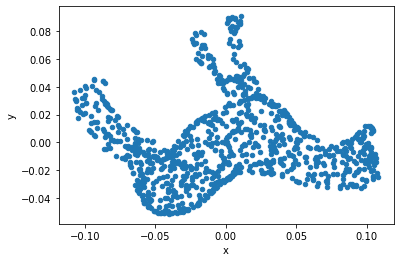

In [ ]:
df = get_data('pointcloud').sample(1000)
pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [ ]:
list('xy')

['x', 'y']

## **Principal Component Analysis (PCA) for NLP**

In [ ]:
import pandas as pd

In [ ]:
from nlpia.data.loaders import get_data

In [ ]:
pd.options.display.width = 120

In [ ]:
sms = get_data('sms-spam')

In [ ]:
index = ['sms{}{}'.format(i, '!'*j) for (i, j) in zip(range(len(sms)), sms.spam)]

In [ ]:
index[:10]

['sms0',
 'sms1',
 'sms2!',
 'sms3',
 'sms4',
 'sms5!',
 'sms6',
 'sms7',
 'sms8!',
 'sms9!']

In [ ]:
sms.index = index

In [ ]:
sms.head(6)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives aro..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

In [ ]:
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()

In [ ]:
tfidf_docs[0:1]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(tfidf.vocabulary_)

9232

In [ ]:
tfidf_docs = pd.DataFrame(tfidf_docs)

In [ ]:
tfidf_docs = tfidf_docs - tfidf_docs.mean()

In [ ]:
tfidf_docs.head()

,0,1,2,...,9229,9230,9231
0,-0.025643,-0.00584,-0.000228,...,-0.000055,-0.000055,-0.000055
1,-0.025643,-0.00584,-0.000228,...,-0.000055,-0.000055,-0.000055
2,-0.025643,-0.00584,-0.000228,...,-0.000055,-0.000055,-0.000055
3,-0.025643,-0.00584,-0.000228,...,-0.000055,-0.000055,-0.000055
4,-0.025643,-0.00584,-0.000228,...,-0.000055,-0.000055,-0.000055


In [ ]:
len(tfidf_docs)

4837

In [ ]:
tfidf_docs.shape

(4837, 9232)

In [ ]:
sms.spam.sum()

638

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=16)

In [ ]:
pca = pca.fit(tfidf_docs)

In [ ]:
pca_topic_vectors = pca.transform(tfidf_docs)

In [ ]:
columns = ['topic{}'.format(i) for i in range(pca.n_components)]

In [ ]:
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns=columns, index=index)

In [ ]:
pca_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,...,topic13,topic14,topic15
sms0,0.201,0.003,0.037,...,-0.031,-0.011,0.038
sms1,0.404,-0.094,-0.078,...,0.013,0.054,-0.037
sms2!,-0.030,-0.048,0.090,...,-0.006,-0.044,0.043
sms3,0.329,-0.033,-0.035,...,0.006,0.029,-0.056
sms4,0.002,0.031,0.038,...,0.040,-0.083,-0.024
sms5!,-0.016,0.059,0.014,...,0.057,0.017,0.042


In [ ]:
tfidf.vocabulary_

{'go': 3807,
 'until': 8487,
 'jurong': 4675,
 'point': 6296,
 ',': 13,
 'crazy': 2549,
 '..': 21,
 'available': 1531,
 'only': 5910,
 'in': 4396,
 'bugis': 1973,
 'n': 5594,
 'great': 3894,
 'world': 8977,
 'la': 4811,
 'e': 3056,
 'buffet': 1971,
 '...': 25,
 'cine': 2277,
 'there': 8071,
 'got': 3855,
 'amore': 1296,
 'wat': 8736,
 'ok': 5874,
 'lar': 4848,
 'joking': 4642,
 'wif': 8875,
 'u': 8395,
 'oni': 5906,
 'free': 3604,
 'entry': 3195,
 '2': 471,
 'a': 1054,
 'wkly': 8933,
 'comp': 2386,
 'to': 8192,
 'win': 8890,
 'fa': 3328,
 'cup': 2608,
 'final': 3450,
 'tkts': 8180,
 '21st': 497,
 'may': 5272,
 '2005': 487,
 '.': 15,
 'text': 8020,
 '87121': 948,
 'receive': 6688,
 'question': 6574,
 '(': 9,
 'std': 7651,
 'txt': 8379,
 'rate': 6628,
 ')': 10,
 't': 7889,
 '&': 7,
 "c's": 2020,
 'apply': 1383,
 '08452810075': 115,
 'over': 6003,
 '18': 438,
 "'": 8,
 's': 6959,
 'dun': 3041,
 'say': 7034,
 'so': 7438,
 'early': 3069,
 'hor': 4207,
 'c': 2019,
 'already': 1268,
 'then': 

In [ ]:
column_nums, terms = zip(*sorted(zip(tfidf.vocabulary_.values(), tfidf.vocabulary_.keys())))

In [ ]:
column_nums[:5]

(0, 1, 2, 3, 4)

In [ ]:
terms[:5]

('!', '"', '#', '#150', '#5000')

In [ ]:
weights = pd.DataFrame(pca.components_, columns=terms, index=['topic{}'.format(i) for i in range(16)])

In [ ]:
pd.options.display.max_columns=8

In [ ]:
weights.head(4).round(3)

,!,"""",#,#150,...,…,┾,〨ud,鈥
topic0,-0.071,0.008,-0.001,-0.000,...,-0.002,0.001,0.001,0.001
topic1,0.064,0.008,0.000,-0.000,...,0.003,0.001,0.001,0.001
topic2,0.071,0.027,0.000,0.001,...,0.002,-0.001,-0.001,-0.001
topic3,-0.059,-0.032,-0.001,-0.000,...,0.001,0.001,0.001,0.001


In [ ]:
pd.options.display.max_columns=12

In [ ]:
deals = weights['! ;) :) half of free crazy deal only $ 80 %'.split()].round(3) * 100

In [ ]:
deals

,!,;),:),half,of,free,crazy,deal,only,$,80,%
topic0,-7.1,0.1,-0.5,-0.0,-2.1,-2.0,-0.0,-0.1,-2.2,0.3,-0.0,-0.0
topic1,6.4,0.0,7.4,0.1,1.7,-2.3,-0.2,-0.1,-3.8,-0.1,-0.0,-0.2
topic2,7.1,0.2,-0.1,0.0,-0.6,4.4,0.1,-0.1,0.7,0.0,0.0,0.1
topic3,-5.9,-0.3,-7.1,0.2,-1.4,-0.2,0.0,0.1,-2.3,0.1,-0.1,-0.3
topic4,38.1,-0.1,-12.5,-0.1,-0.5,9.9,0.1,-0.2,3.0,0.3,0.1,-0.1
topic5,-26.5,0.1,-1.5,-0.3,-5.9,-1.3,-0.6,-0.2,-1.8,-0.9,0.0,0.0
topic6,-10.9,-0.5,19.9,-0.4,-2.0,-0.6,-0.2,-0.1,-1.4,-0.0,-0.0,-0.1
topic7,16.1,0.1,-17.6,0.8,3.4,-2.9,0.0,0.1,-1.8,-0.3,0.0,-0.1
topic8,34.4,0.1,5.2,-0.4,-4.6,0.1,-0.4,-0.4,3.3,-0.6,-0.0,-0.2
topic9,7.8,-0.3,16.0,1.4,-8.4,6.1,-0.5,-0.4,2.9,-0.5,-0.0,0.0


In [ ]:
deals.T.sum()

topic0    -13.6
topic1      8.9
topic2     11.8
topic3    -17.2
topic4     38.0
topic5    -38.9
topic6      3.7
topic7     -2.2
topic8     36.5
topic9     24.1
topic10   -33.7
topic11   -41.1
topic12     8.9
topic13    41.7
topic14    32.0
topic15     3.6
dtype: float64

## **Truncated Singular Value Decomposition (SVD)**

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=16, n_iter=100)

In [ ]:
svd_topic_vectors = svd.fit_transform(tfidf_docs.values)

In [ ]:
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns=columns, index=index)

In [ ]:
svd_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.201,0.003,0.037,0.011,-0.019,-0.053,...,0.007,-0.007,0.002,-0.036,-0.014,0.037
sms1,0.404,-0.094,-0.078,0.051,0.100,0.047,...,-0.004,0.036,0.043,-0.021,0.051,-0.042
sms2!,-0.030,-0.048,0.090,-0.067,0.091,-0.043,...,0.125,0.023,0.026,-0.020,-0.042,0.052
sms3,0.329,-0.033,-0.035,-0.016,0.052,0.056,...,0.022,0.023,0.073,-0.046,0.022,-0.070
sms4,0.002,0.031,0.038,0.034,-0.075,-0.093,...,0.028,-0.009,0.027,0.034,-0.083,-0.021
sms5!,-0.016,0.059,0.014,-0.006,0.122,-0.040,...,0.041,0.055,-0.037,0.075,-0.001,0.020


In [ ]:
import numpy as np

In [ ]:
svd_topic_vectors = (svd_topic_vectors.T/np.linalg.norm(svd_topic_vectors, axis=1)).T

In [ ]:
svd_topic_vectors.iloc[:10].dot(svd_topic_vectors.iloc[:10].T).round(1)

,sms0,sms1,sms2!,sms3,sms4,sms5!,sms6,sms7,sms8!,sms9!
sms0,1.0,0.6,-0.1,0.6,-0.0,-0.3,-0.3,-0.1,-0.3,-0.3
sms1,0.6,1.0,-0.2,0.8,-0.2,0.0,-0.2,-0.2,-0.1,-0.1
sms2!,-0.1,-0.2,1.0,-0.2,0.1,0.4,0.0,0.3,0.5,0.4
sms3,0.6,0.8,-0.2,1.0,-0.2,-0.3,-0.1,-0.3,-0.2,-0.1
sms4,-0.0,-0.2,0.1,-0.2,1.0,0.2,0.0,0.1,-0.4,-0.2
sms5!,-0.3,0.0,0.4,-0.3,0.2,1.0,-0.1,0.1,0.3,0.4
sms6,-0.3,-0.2,0.0,-0.1,0.0,-0.1,1.0,0.1,-0.2,-0.2
sms7,-0.1,-0.2,0.3,-0.3,0.1,0.1,0.1,1.0,0.1,0.4
sms8!,-0.3,-0.1,0.5,-0.2,-0.4,0.3,-0.2,0.1,1.0,0.3
sms9!,-0.3,-0.1,0.4,-0.1,-0.2,0.4,-0.2,0.4,0.3,1.0


## **Latent Dirichlet Allocation (LDA)**

In [ ]:
sms.text

sms0        Go until jurong point, crazy.. Available only ...
sms1                            Ok lar... Joking wif u oni...
sms2!       Free entry in 2 a wkly comp to win FA Cup fina...
sms3        U dun say so early hor... U c already then say...
sms4        Nah I don't think he goes to usf, he lives aro...
                                  ...                        
sms4832!    This is the 2nd time we have tried 2 contact u...
sms4833                  Will ü b going to esplanade fr home?
sms4834     Pity, * was in mood for that. So...any other s...
sms4835     The guy did some bitching but I acted like i'd...
sms4836                            Rofl. Its true to its name
Name: text, Length: 4837, dtype: object

In [ ]:
total_corpus_len = 0

In [ ]:
for document_text in sms.text:
  total_corpus_len = total_corpus_len + len(casual_tokenize(document_text))
print(total_corpus_len)

103260


In [ ]:
len(sms)

4837

In [ ]:
mean_document_len = total_corpus_len / len(sms)

In [ ]:
round(mean_document_len, 2)

21.35

In [ ]:
!pip install nlpia

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from nltk.tokenize import casual_tokenize

In [ ]:
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
counter = CountVectorizer(tokenizer=casual_tokenize)

In [ ]:
bow_docs = pd.DataFrame(counter.fit_transform(raw_documents=sms.text).toarray(), index=index)

In [ ]:
column_nums, terms = zip(*sorted(zip(counter.vocabulary_.values(), counter.vocabulary_.keys())))

In [ ]:
bow_docs.columns = terms

In [ ]:
sms.loc['sms0'].text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
bow_docs.loc['sms0'][bow_docs.loc['sms0'] > 0].head()

,            1
..           1
...          2
amore        1
available    1
Name: sms0, dtype: int64

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDiA

In [ ]:
ldia = LDiA(n_components=16, learning_method='batch')
ldia = ldia.fit(bow_docs)
ldia.components_.shape

(16, 9232)

In [ ]:
pd.set_option('display.width', 75)
components = pd.DataFrame(ldia.components_.T, index=terms, columns=columns)
components.round(2).head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
!,184.03,15.00,72.22,394.95,45.48,36.14,...,37.42,44.18,64.40,297.29,41.16,11.70
"""",0.68,4.22,2.41,0.06,152.35,0.06,...,8.42,11.42,0.07,62.72,12.27,0.06
#,0.06,0.06,0.06,0.06,0.06,2.07,...,0.06,0.06,1.07,4.05,0.06,0.06


In [ ]:
components.topic3.sort_values(ascending=False)[:10]

!       394.952246
.       218.049724
to      119.533134
u       118.857546
call    111.948541
£       107.358914
,        96.954384
*        90.314783
your     90.215961
is       75.750037
Name: topic3, dtype: float64

In [ ]:
ldia16_topic_vectors = ldia.transform(bow_docs)

In [ ]:
ldia16_topic_vectors = pd.DataFrame(ldia16_topic_vectors, index=index, columns=columns)

In [ ]:
ldia16_topic_vectors.round(2).head()

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.00,0.62,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms1,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.12,0.01,0.01,0.01,0.01
sms2!,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms3,0.00,0.00,0.00,0.00,0.09,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms4,0.39,0.00,0.33,0.00,0.00,0.00,...,0.00,0.00,0.09,0.00,0.00,0.00


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ldia16_topic_vectors, sms.spam, test_size=0.5, random_state=271828)

In [ ]:
lda = LDA(n_components=1)

In [ ]:
lda = lda.fit(X_train, y_train)

In [ ]:
sms['ldia16_spam'] = lda.predict(ldia16_topic_vectors)

In [ ]:
round(float(lda.score(X_test, y_test)), 2)

0.94

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.tokenize.casual import casual_tokenize

In [ ]:
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)

In [ ]:
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()

In [ ]:
tfidf_docs = tfidf_docs - tfidf_docs.mean(axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_docs, sms.spam.values, test_size=0.5, random_state=271828)

In [ ]:
lda = LDA(n_components=1)

In [ ]:
lda = lda.fit(X_train, y_train)

In [ ]:
round(float(lda.score(X_train, y_train)), 3)

1.0

In [ ]:
round(float(lda.score(X_test, y_test)), 3)

0.748

In [ ]:
ldia32 = LDiA(n_components=32, learning_method='batch')

In [ ]:
ldia32 = ldia32.fit(bow_docs)

In [ ]:
ldia32.components_.shape

(32, 9232)

In [ ]:
ldia32_topic_vectors = ldia32.transform(bow_docs)

In [ ]:
columns32 = ['topic{}'.format(i) for i in range(ldia32.n_components)]

In [ ]:
ldia32_topic_vectors = pd.DataFrame(ldia32_topic_vectors, index=index, columns=columns32)

In [ ]:
ldia16_topic_vectors.round(2).head()

,topic0,topic1,topic2,topic3,topic4,topic5,...,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.00,0.62,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms1,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.12,0.01,0.01,0.01,0.01
sms2!,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms3,0.00,0.00,0.00,0.00,0.09,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00
sms4,0.39,0.00,0.33,0.00,0.00,0.00,...,0.00,0.00,0.09,0.00,0.00,0.00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ldia32_topic_vectors, sms.spam, test_size=0.5, random_state=271828)

In [ ]:
lda = LDA(n_components=1)

In [ ]:
lda = lda.fit(X_train, y_train)

In [ ]:
sms['ldia32_spam'] = lda.predict(ldia32_topic_vectors)

In [ ]:
X_train.shape

(2418, 32)

In [ ]:
round(float(lda.score(X_train, y_train)), 3)

0.933

In [ ]:
round(float(lda.score(X_test, y_test)), 3)

0.936

In [ ]:
import sklearn

In [ ]:
sklearn.__file__

'/usr/local/lib/python3.6/dist-packages/sklearn/__init__.py'

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
LDA??

## **Linear Discriminant Analysis (LDA)**

In [ ]:
from nlpia.data.loaders import get_data

/usr/local/lib/python3.6/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')


In [ ]:
sms = get_data('sms-spam')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

In [ ]:
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=1)

In [ ]:
lda = lda.fit(tfidf_docs, sms.spam)

In [ ]:
sms['lda_spaminess'] = lda.predict(tfidf_docs)

In [ ]:
((sms.spam - sms.lda_spaminess) ** 2).sum() ** .5

0.0

In [ ]:
(sms.spam == sms.lda_spaminess).sum() 

4837

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lda = LDA(n_components=1)

In [ ]:
scores = cross_val_score(lda, tfidf_docs, sms.spam, cv=5)

In [ ]:
print("Accuracy: {:.2f} (+/-{:.2f}) ".format(scores.mean(), scores.std() *2))

Accuracy: 0.96 (+/-0.01) 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_docs, sms.spam, test_size=0.3, random_state=271828)

In [ ]:
lda = LDA(n_components=1)

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda.score(X_test, y_test).round(3)

0.965

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=16)

In [ ]:
pca = pca.fit(tfidf_docs)

In [ ]:
pca_topic_vectors = pca.transform(tfidf_docs)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_topic_vectors, sms.spam, test_size=0.3, random_state=271828)

In [ ]:
lda = LDA(n_components=1)

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda.score(X_test, y_test).round(3)

0.966

In [ ]:
lda = LDA(n_components=1)

In [ ]:
scores = cross_val_score(lda, pca_topic_vectors, sms.spam, cv=10)

In [ ]:
print("Accuracy: {:.2f} (+/-{:.2f}) ".format(scores.mean(), scores.std() *2))

Accuracy: 0.96 (+/-0.02) 


# **Luis Serrano Application of Singular Value Decomposition (SVD)**

## **Image Compression**

In [ ]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 

In [ ]:
vmin = 0
vmax = 1
image_bias = 1 # sometimes 1

def plot_svd(A):
  n = len(A)
  imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
  plt.show()
  U, S, V = svd(A)

  imgs = []
  for i in range(n):
    imgs.append(S[i] * np.outer(U[:, i], V[i]))

  combined_imgs = []
  for i in range(n):
    imgs.append(S[i] * np.outer(U[:, i], V[i]))

  combined_imgs = []
  for i in range(n):
    img = sum(imgs[:i+1])
    combined_imgs.append(img)

  fig, axes = plt.subplots(figsize= (n*n,n), nrows=1, ncols=n, sharex=True, sharey=True)
  for num, ax in zip(range(n), axes):
    ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    ax.set_title(np.round(S[num], 2), fontsize=80)
  plt.show()

  fig, axes = plt.subplots(figsize=(n*n, n), nrows = 1, ncols = n, sharex=True, sharey=True)
  for num, ax in zip(range(n), axes):
    ax.imshow(image_bias - combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
  plt.show()

  return U, S, V

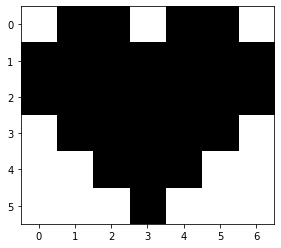

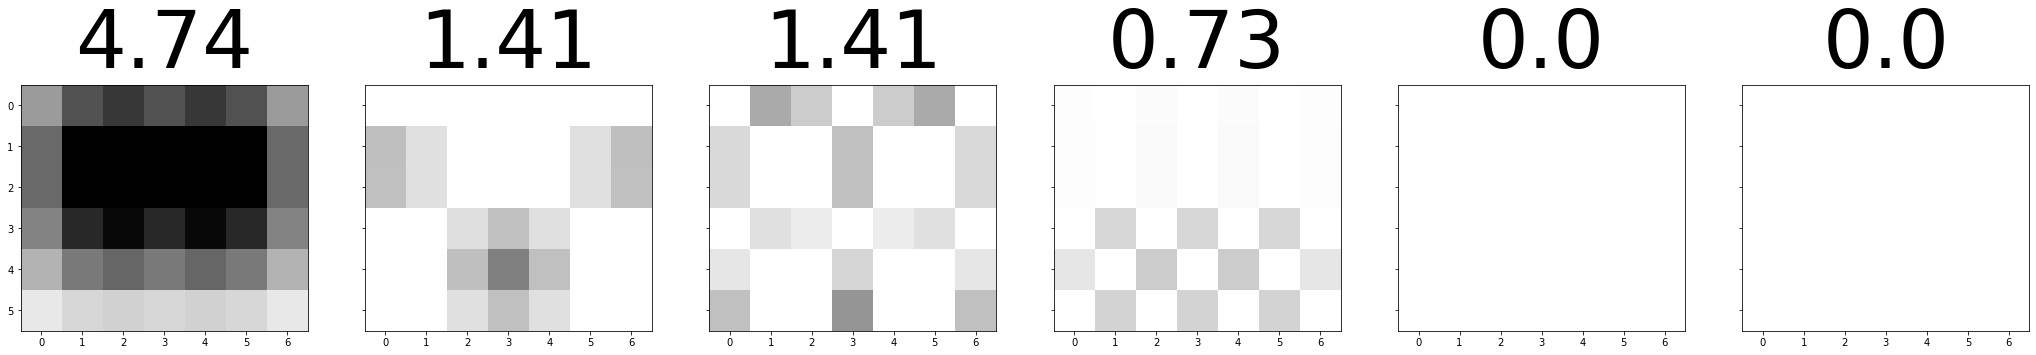

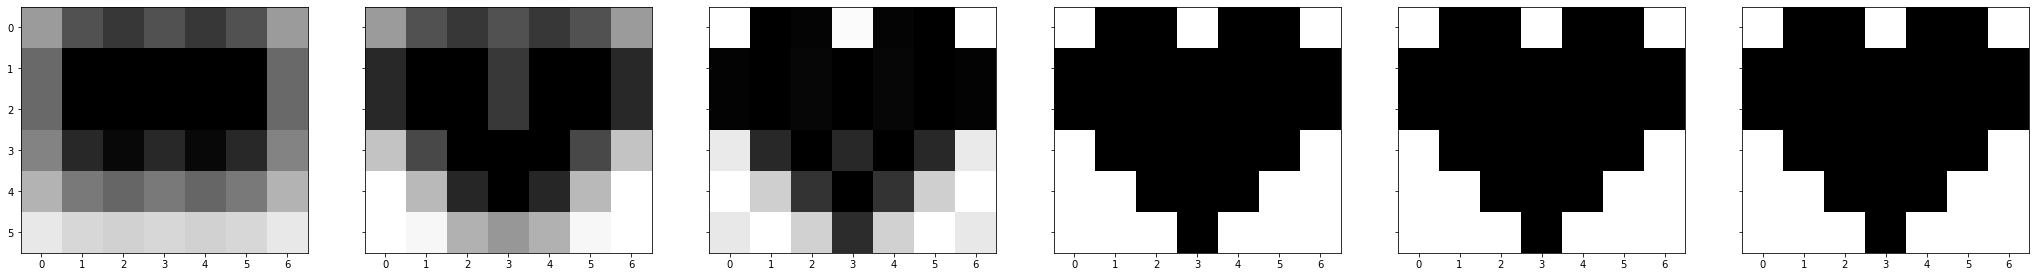

In [ ]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])

U, S, V = plot_svd(D)